# Code to use and work with c302

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
%pwd

'/Users/manuel/openworm_tools/c302'

In [3]:
#%cd c302/

In [4]:
# To clear output - Press 'ESC' + 'R' + 'Y' + 'Enter'
# !./fast_run_1 FWandBW_tries

## Functions

**Read Data -** Creates an array without the first column (time values) 

**Prepare Array -** Changes the array so that it can be represented in a given number of time measures 

**Plot Data -** Makes a plot using the data given, the legend introduced and the title of the graph

**Find Cells -** Obtains the names of the cells from the LEMS file to use for the legend


In [5]:
def read_data(filename):
    with open(filename) as f:
        line = f.readline()
    col = len(line.split())
    array = np.loadtxt(filename, usecols=range(0,col))
    #array = np.delete(array, 0, 1) #delete first column (time)
    #array = np.delete(array, 0, 0) #delete first row (t=0)
    #array[a,b] = element in row a+1, in column b+1 
    #print(array[0,0])
    return array

In [6]:
def prepare_array(arr_in, time_measures):
    # The array that comes in: 
    # Has for x the number of neurons/muscles + 1 (one extra column for time values)
    # Has for y the time intervales
    y, x = arr_in.shape
    #print("Number of muscles/neurons: %d" %(x))
    #print("Number of time measures: %d" %(y))
    value = np.floor(y/time_measures)
    value = value.astype(int)
    #print(value)
    arr = np.zeros((time_measures, x))
    #print(arr)
    for i in range(0, time_measures):
        number_to_delete = value - 1
        #print(i*number_to_delete)
        arr[i] = arr_in[i*number_to_delete]
        #print(arr)
        
    
    arr_out = arr
    return arr_out

In [7]:
def find_cells():
    text = open(LEMS, "r")
    count = 0
    s = []
    for j in text:
        s.append(j)
        count = count + 1
    
    def search(word, sentences):
        return [i for i in sentences if re.search(r'\b%s\b' % word, i)]
    strings = search('Cells', s) #Find all the lines in the LEMS file with the word Cells
    
    for i in strings:
        if re.search(r'.*Cells:.*', i):
            cells_str = i
    #print(cells_str) #cells_str is the line with the cells of the simulation of the LEMS file


    parts = re.split('[\']',cells_str)
    #print(len(parts))
    cells = [] #List of cells in the LEMS file
    if len(parts) <3:
        print('No cells in this file')
    else:
        for i in range(len(parts)):
            if (i % 2) != 0:
                cells.append(parts[i])
    #print(cells)
    text.close()
    cells.sort()
    return cells


In [8]:
def find_muscles(LEMS):
    text = open(LEMS, "r")
    count = 0
    s = []
    for j in text:
        s.append(j)
        count = count + 1
    
    def search(word, sentences):
        return [i for i in sentences if re.search(r'\b%s\b' % word, i)]
    strings = search('Muscles', s) #Find all the lines in the LEMS file with the word Muscles
    
    for i in strings:
        if re.search(r'.*Muscles:.*', i):
            muscles_str = i
    #print(muscles_str) #muscles_str is the line with the muscles of the simulation of the LEMS file
    
    
    # We need to note that 'Muscles: True' and 'Muscles: All muscles' will print all the muscles!!
    
    if ('All' in muscles_str or 'True' in muscles_str):
        # Create complete muscle List
        muscleList = []
        quadrants = ['DL', 'DR', 'VL', 'VR']
        for i in range(24):
            for quadrant in quadrants:
                #print(quadrant)
                #print(str(i+1))
                if i < 9:
                    muscleList.append('M%s0%s' %(quadrant, str(i+1)))
                else:
                    muscleList.append('M%s%s' %(quadrant, str(i+1)))
        
        muscles = sorted(muscleList)
    else:
        parts = re.split('[\']',muscles_str)
        muscles = []
        if len(parts) < 3:
            print('No muscles in this file')
        else:
            for i in range(len(parts)):
                if (i % 2) != 0:
                    muscles.append(parts[i])
        muscles.sort()
        
    text.close()
    #print(muscles)
    return muscles

In [9]:
#def plot_data(data, labels, title):
def plot_data(data, labels, title):
    fig = plt.figure(figsize=(12, 6)) #width and heigth
    #'''
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('time (s)')
    #ax.set(ylim=(-0.075, 0.025))
    #ax.legend(labels)
    data = np.transpose(data)
    #'''
    time = data[0].tolist()
    for i in range(len(labels)):
        value = data[i+1].tolist()
        cell = labels[i]
        ax.plot(time, value, label = cell)
    leg = ax.legend()
    #'''
    

In [10]:
def plot_three_data(data, labels, title, first_index, second_index, third_index):
    fig = plt.figure(figsize=(12, 6)) #width and heigth
    #'''
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    ax1.set_title(title)
    ax3.set_xlabel('time (s)')
    #ax1.set(ylim=(-0.08, 0.025))
    #ax2.set(ylim=(-0.08, 0.025))
    #ax3.set(ylim=(-0.1, 0))
    #'''
    #ax.legend(labels)
    data = np.transpose(data)

    from cycler import cycler
    #'''
    
    #Colorsets: 
    #DB - [BuGn (0.6, 0.2)]     VB - [YlGn (0.8, 0.4)]
    #DA - [YlOrRd (0.2, 0.5)]     VA -  [Oranges(0.4, 1)]
    #DD - [PuBu (0.2, 0.6)]     VD - [Blues (0.1, 0.5)]
    #AS - [RdPu (0.2, 0.6)]
    #AVA and AVB: 
    #colors =['#cc0000ff', '#6aa84fff']
    
    time = data[0].tolist()
    colors = [plt.cm.YlOrRd(i) for i in np.linspace(0.2, 0.5, len(first_index))] #YlGn
    #colors = ['#a0dacb', '#27613e']
    ax1.set_prop_cycle(cycler('color', colors))
    for i in first_index:
        value = data[i+1].tolist()
        cell = labels[i]
        ax1.plot(time, value, label = cell)
    
    #CODE TO SET LEGEND TO THE RIGHT OUTSIDE
    # Shrink current axis by 20%
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    
    
    colors = [plt.cm.Oranges(i) for i in np.linspace(0.4, 1, len(second_index))] #copper
    #colors = ['#fec35d', '#793f25']
    ax2.set_prop_cycle(cycler('color', colors))
    for i in second_index:
        value = data[i+1].tolist()
        cell = labels[i]
        ax2.plot(time, value, label = cell)
    leg = ax2.legend(ncol=2)
    
    #Set legent to the right
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    
    
    colors = [plt.cm.RdPu(i) for i in np.linspace(0.2, 0.6, len(third_index))] #RdBu
    #colors =['#f6afc1']
    ax3.set_prop_cycle(cycler('color', colors))
    for i in third_index:
        value = data[i+1].tolist()
        cell = labels[i]
        ax3.plot(time, value, label = cell)
    leg = ax3.legend(ncol=2)
    
    #Set legent to the right
    box = ax3.get_position()
    ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    #'''

In [153]:
def plot_all_motor_neurons(data, labels, title, limits):
    
    # This function plots 7 subplots of all the neuron types in the ventral cord: AS, DA, DB, DD, VD, VB and VA
    
    from cycler import cycler
    range_incl = lambda start, end:range(start, end + 1)
    data = np.transpose(data)
    ######### PLOT FIGUTE #######

    fig = plt.figure(figsize=(12, 12)) #width and heigth
    ax = [fig.add_subplot(num) for num in range_incl(711,717)] #The figute has 7 axes, one for each type of neurons
    ax[0].set_title(title)
    ax[6].set_xlabel('time (s)')

    neuron_names = ['AS', 'DA', 'DB', 'DD', 'VD', 'VB', 'VA']
    i = 0
    time = data[0].tolist()
    cells = labels
    
    for neuron in neuron_names:
        
        ### Set names to plot neurons = AS01, AS02, AS03... AS15
        neurons = [neuron + "{:02d}".format(c) for c in range_incl(1, 15)]
        #print(neurons)
        index = [] #Index will showe where these types of neurons are in the whole array of cells
        for j in range(len(cells)):
            if cells[j] in neurons:
                index.append(j)
        #print(index)


        #Each neuron type is assigned a variety of colors 
        if neuron == 'AS':
            colors = [plt.cm.RdPu(i) for i in np.linspace(0.6, 0.2, len(index))] #AS
        elif neuron == 'DA':
            colors = [plt.cm.YlOrRd(i) for i in np.linspace(0.2, 0.5, len(index))] #DA
        elif neuron == 'DB':
            colors = [plt.cm.BuGn(i) for i in np.linspace(0.6, 0.2, len(index))] #DB
        elif neuron == 'DD':
            colors = [plt.cm.PuBu(i) for i in np.linspace(0.9, 0.5, len(index))] #DD
        elif neuron == 'VD':
            colors = [plt.cm.Blues(i) for i in np.linspace(0.5, 0.3, len(index))] #VD
        elif neuron == 'VB':
            colors = [plt.cm.YlGn(i) for i in np.linspace(0.8, 0.4, len(index))] #VB
        elif neuron == 'VA':
            colors = [plt.cm.Oranges(i) for i in np.linspace(0.4, 1, len(index))] #VA

        ax[i].set_prop_cycle(cycler('color', colors))
        ax[i].set(ylim=limits)
        for j in index:
            value = data[j+1].tolist()
            cell = labels[j]
            ax[i].plot(time, value, label = cell)
        
        #Set the Legend in 2 columns and outside the plot
        leg = ax[i].legend(ncol=2)
        box = ax[i].get_position()
        ax[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

        i = i + 1


In [11]:
def map_plot(arrayName, title):
    fig = plt.figure(figsize=(5, 6)) #width and heigth

    ax = fig.add_subplot(111)
    ax.set_title(title)
    plt.imshow(arrayName).set_cmap('coolwarm')
    ax.set_aspect('auto')
    ax.get_yaxis().set_visible(False)

    cax = fig.add_axes([0.8, 0.1, 0.3, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()

## Insert reference for file

In [144]:
reference = 'FWandBW_VNC' #Change the name here
parameters = 'C2'
include_neurons = True
include_muscles = False
movement = True
isNeuronSimulation = True #Can be done with NEURON or PyNeuroML


In [145]:
%cd ..
if isNeuronSimulation: 
    !./run_nrn_c302.sh -r {reference} -p {parameters}
else:
    !./run_pynml_c302.sh -r {reference} -p {parameters}
%cd c302/


/Users/manuel/openworm_tools
access control disabled, clients can connect from any host
FWandBW_VNC
worm
PyOpenWorm
build
c302
c302.egg-info
dist
master_openworm.py
neuron
pyNeuroML
shared
sibernetic
access control disabled, clients can connect from any host
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C2
c302      >>>  Setting parameter ca_conc_decay_time_muscle = 60.8 ms
c302      >>>  Setting parameter initial_memb_pot = -50 mV
c302      >>>  Setting parameter ca_conc_rho_muscle = 0.002338919 mol_per_m_per_A_per_s
c302      >>>  
c302      >>> 
c302      >>> Parameters and setting used to generate this network:
c302      >>> 
c302      >>>     Data reader:                    UpdatedSpreadsheetDataReader2
c302      >>>     c302 version:                   0.7.5
c302      >>>     PyOpenWorm version:             0.10.0.post0
c302      >>>     Cells:                          ['VA1', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7', 'VA8', 'VA9', 'VA10', '

c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VA9.cell.nml; id: VA9; placing at location: (-1.8, 208.825, -9.049999)
c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VB1.cell.nml; id: VB1; placing at location: (-1.55, -246.45, 16.4)
c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VB10.cell.nml; id: VB10; placing at location: (-1.85, 218.07498, -11.4)
c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VB11.cell.nml; id: VB11; placing at location: (-1.8249999, 262.325, -21.95)
c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VB2.cell.nml; id: VB2; placing at location: (-2.0, -253.3, 19.85)
c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VB3.cell.nml; id: VB3; placing at location: (-1.85, -210.225, -8.725)
c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VB4.cell.nml; id: VB4; placing at location: (-2.0, -173.25, -33.5)
c302      >>>  Loaded morphology: /home/ow/c302/c302/NeuroML2/VB5.cell.nml; i

c302      >>>  >> Changing number of effective synapses connection DB1 -> VD2: was: 24 (total cond: 4.8nS), becomes 1 (total cond: 0.200000000000000nS)
c302      >>>  Adding parameter DB1_to_VD3_exc_syn_conductance = 0.2 nS
c302      >>>  >> Changing number of effective synapses connection DB1 -> VD3: was: 2 (total cond: 0.4nS), becomes 1 (total cond: 0.200000000000000nS)
c302      >>>  >> Changing number of effective synapses connection DB2 -> AS3: was: 3 (total cond: 1.47nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  >> Changing number of effective synapses connection DB2 -> AS4: was: 2 (total cond: 0.98nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  >> Changing polarity of connection DB2 -> DD1: was: exc, becomes inh 
c302      >>>  >> Changing number of effective synapses connection DB2 -> DD1: was: 3 (total cond: 0.87nS), becomes 1 (total cond: 0.290000000000000nS)
c302      >>>  >> Changing polarity of connection DB2 -> DD2: was: exc, becomes inh 

c302      >>>  >> Changing number of effective synapses connection VA2 -> DD1: was: 20 (total cond: 9.8nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  Adding parameter VA2_to_VA1_exc_syn_conductance = 30 nS
c302      >>>  Adding parameter VA2_to_VA1_exc_syn_ar = 0.19 per_s
c302      >>>  Adding parameter VA2_to_VA1_exc_syn_ad = 73 per_s
c302      >>>  Adding parameter VA2_to_VA1_exc_syn_vth = -22 mV
c302      >>>  Adding parameter VA2_to_VA1_exc_syn_erev = 10 mV
c302      >>>  Adding parameter VA2_to_VA1_exc_syn_beta = 2.81 per_mV
c302      >>>  >> Changing number of effective synapses connection VA2 -> VA1: was: 2 (total cond: 60.0nS), becomes 1 (total cond: 30.000000000000000nS)
c302      >>>  Adding parameter VA2_to_VA3_exc_syn_conductance = 30 nS
c302      >>>  Adding parameter VA2_to_VA3_exc_syn_ar = 0.19 per_s
c302      >>>  Adding parameter VA2_to_VA3_exc_syn_ad = 73 per_s
c302      >>>  Adding parameter VA2_to_VA3_exc_syn_vth = -22 mV
c302      >>>  Adding param

c302      >>>  >> Changing number of effective synapses connection VB8 -> DD6: was: 19 (total cond: 9.31nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  >> Changing number of effective synapses connection VB9 -> DD5: was: 10 (total cond: 4.9nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  >> Changing number of effective synapses connection VB9 -> DD6: was: 19 (total cond: 9.31nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  >> Changing number of effective synapses connection VB10 -> DD6: was: 19 (total cond: 9.31nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  >> Changing number of effective synapses connection VB11 -> DD6: was: 19 (total cond: 9.31nS), becomes 1 (total cond: 0.490000000000000nS)
c302      >>>  >> Changing number of effective synapses connection VD1 -> VA1: was: 8 (total cond: 2.32nS), becomes 1 (total cond: 0.290000000000000nS)
c302      >>>  >> Changing number of effective synapses connection VD1 -> VB1: was

c302      >>>  >> Changing number of effective synapses connection AVAR -> DA6 GapJunction: was: 4 (total cond: 0.004nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter AVAR_to_DA8_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter DA8_to_AVAR_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection AVAR -> DA8 GapJunction: was: 5 (total cond: 0.005nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter AVAR_to_DA9_elec_syn_gbase = 0.005 nS
c302      >>>  Adding parameter DA9_to_AVAR_elec_syn_gbase = 0.005 nS
c302      >>>  >> Changing number of effective synapses connection AVAR -> DA9 GapJunction: was: 4 (total cond: 0.02nS), becomes 1 (total cond: 0.005000000000000nS)
c302      >>>  Adding parameter AVAR_to_VA1_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VA1_to_AVAR_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection AVAR -> VA1 GapJ

c302      >>>  Adding parameter VB6_to_AVBR_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection AVBR -> VB6 GapJunction: was: 4 (total cond: 0.004nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter AVBR_to_VB7_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VB7_to_AVBR_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection AVBR -> VB7 GapJunction: was: 3 (total cond: 0.003nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter AVBR_to_VB8_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VB8_to_AVBR_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection AVBR -> VB8 GapJunction: was: 3 (total cond: 0.003nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter AVBR_to_VB9_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VB9_to_AVBR_elec_syn_gbase = 0.001 nS
c302      >>

c302      >>>  Adding parameter DD5_to_DD4_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection DD4 -> DD5 GapJunction: was: 3 (total cond: 0.003nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Setting parameter DD5_to_DD4_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter DD4_to_DD5_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection DD5 -> DD4 GapJunction: was: 3 (total cond: 0.003nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter DD5_to_DD6_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter DD6_to_DD5_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection DD5 -> DD6 GapJunction: was: 3 (total cond: 0.003nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Setting parameter DD6_to_DD5_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter DD5_to_DD6_elec_syn_gbase = 0.001 nS
c302      >>>  >> 

c302      >>>  Setting parameter VB2_to_VB3_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection VB3 -> VB2 GapJunction: was: 10 (total cond: 0.01nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter VB3_to_VB4_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VB4_to_VB3_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VB4_to_DB2_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter DB2_to_VB4_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VB4_to_VB2_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VB2_to_VB4_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VB4_to_VB3_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VB3_to_VB4_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VB4_to_VB5_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VB5_to_VB4_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VB5_to_VB4_elec_syn_gbase = 0.001 nS

c302      >>>  >> Changing number of effective synapses connection VD5 -> VD6 GapJunction: was: 10 (total cond: 0.01nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Setting parameter VD6_to_VD5_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VD5_to_VD6_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection VD6 -> VD5 GapJunction: was: 10 (total cond: 0.01nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Adding parameter VD6_to_VD7_elec_syn_gbase = 0.001 nS
c302      >>>  Adding parameter VD7_to_VD6_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection VD6 -> VD7 GapJunction: was: 15 (total cond: 0.015nS), becomes 1 (total cond: 0.001000000000000nS)
c302      >>>  Setting parameter VD7_to_VD6_elec_syn_gbase = 0.001 nS
c302      >>>  Setting parameter VD6_to_VD7_elec_syn_gbase = 0.001 nS
c302      >>>  >> Changing number of effective synapses connection VD7 -> VD6 GapJunct

c302      >>>  Adding parameter DA4_to_DA3_exc_syn_beta = 0.21 per_mV
c302      >>>  Adding parameter DA4_to_DA3_exc_syn_conductance = 30 nS
c302      >>>  Adding parameter DA4_to_DA3_exc_syn_erev = 10 mV
c302      >>>  >> Changing number of effective synapses connection DA4 -> DA3: was: 5 (total cond: 150.0nS), becomes 1 (total cond: 30.000000000000000nS)
c302      >>>  Adding parameter DA3_to_DA2_exc_syn_ad = 18 per_s
c302      >>>  Adding parameter DA3_to_DA2_exc_syn_ar = 0.08 per_s
c302      >>>  Adding parameter DA3_to_DA2_exc_syn_vth = -10 mV
c302      >>>  Adding parameter DA3_to_DA2_exc_syn_beta = 0.21 per_mV
c302      >>>  Adding parameter DA3_to_DA2_exc_syn_conductance = 30 nS
c302      >>>  Adding parameter DA3_to_DA2_exc_syn_erev = 10 mV
c302      >>>  >> Changing number of effective synapses connection DA3 -> DA2: was: 5 (total cond: 150.0nS), becomes 1 (total cond: 30.000000000000000nS)
c302      >>>  Adding parameter DA2_to_DA1_exc_syn_ad = 18 per_s
c302      >>>  Adding

pyNeuroML >>> (INFO) -- Writing to mod: /home/ow/c302/examples/DA7_to_DB6_exc_syn.mod
pyNeuroML >>> (INFO) File /home/ow/c302/examples/DA7_to_DB6_exc_syn.mod exists and is identical
pyNeuroML >>> (INFO) -- Writing to mod: /home/ow/c302/examples/DA8_to_DA7_exc_syn.mod
pyNeuroML >>> (INFO) File /home/ow/c302/examples/DA8_to_DA7_exc_syn.mod exists and is identical
pyNeuroML >>> (INFO) -- Writing to mod: /home/ow/c302/examples/DA8_to_DB7_exc_syn.mod
pyNeuroML >>> (INFO) File /home/ow/c302/examples/DA8_to_DB7_exc_syn.mod exists and is identical
pyNeuroML >>> (INFO) -- Writing to mod: /home/ow/c302/examples/DA9_to_DA8_exc_syn.mod
pyNeuroML >>> (INFO) File /home/ow/c302/examples/DA9_to_DA8_exc_syn.mod exists and is identical
pyNeuroML >>> (INFO) -- Writing to mod: /home/ow/c302/examples/DA9_to_DB7_exc_syn.mod
pyNeuroML >>> (INFO) File /home/ow/c302/examples/DA9_to_DB7_exc_syn.mod exists and is identical
pyNeuroML >>> (INFO) -- Writing to mod: /home/ow/c302/examples/neuron_to_neuron_inh_syn.mo

AVAL_to_DA1_elec_syn.mod AVAL_to_DA2_elec_syn.mod AVAL_to_DA3_elec_syn.mod AVAL_to_DA4_elec_syn.mod AVAL_to_DA5_elec_syn.mod AVAL_to_DA6_elec_syn.mod AVAL_to_DA7_elec_syn.mod AVAL_to_DA8_elec_syn.mod AVAL_to_DA9_elec_syn.mod AVAL_to_VA10_elec_syn.mod AVAL_to_VA11_elec_syn.mod AVAL_to_VA1_elec_syn.mod AVAL_to_VA2_elec_syn.mod AVAL_to_VA3_elec_syn.mod AVAL_to_VA4_elec_syn.mod AVAL_to_VA5_elec_syn.mod AVAL_to_VA6_elec_syn.mod AVAL_to_VA7_elec_syn.mod AVAL_to_VA8_elec_syn.mod AVAL_to_VA9_elec_syn.mod AVAR_to_DA1_elec_syn.mod AVAR_to_DA2_elec_syn.mod AVAR_to_DA3_elec_syn.mod AVAR_to_DA4_elec_syn.mod AVAR_to_DA5_elec_syn.mod AVAR_to_DA6_elec_syn.mod AVAR_to_DA8_elec_syn.mod AVAR_to_DA9_elec_syn.mod AVAR_to_VA10_elec_syn.mod AVAR_to_VA11_elec_syn.mod AVAR_to_VA12_elec_syn.mod AVAR_to_VA1_elec_syn.mod AVAR_to_VA3_elec_syn.mod AVAR_to_VA4_elec_syn.mod AVAR_to_VA5_elec_syn.mod AVAR_to_VA7_elec_syn.mod AVAR_to_VA8_elec_syn.mod AVAR_to_VA9_elec_syn.mod AVBL_to_DB2_elec_syn.mod AVBL_to_DB3_elec_syn

"/home/ow/neuron/nrn/x86_64/bin/nocmodl" stim_AVAL_1
Translating stim_AVAL_1.mod into stim_AVAL_1.c
Thread Safe
"/home/ow/neuron/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/home/ow/neuron/nrn/include/nrn" -I"/home/ow/neuron/nrn/x86_64/lib"      -g -O2 -c -o stim_AVAL_1.lo `test -f 'stim_AVAL_1.c' || echo '/'`stim_AVAL_1.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/home/ow/neuron/nrn/include/nrn -I/home/ow/neuron/nrn/x86_64/lib -g -O2 -c stim_AVAL_1.c  -fPIC -DPIC -o .libs/stim_AVAL_1.o
"/home/ow/neuron/nrn/x86_64/bin/nocmodl" stim_AVAR_1
Translating stim_AVAR_1.mod into stim_AVAR_1.c
Thread Safe
"/home/ow/neuron/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/home/ow/neuron/nrn/include/nrn" -I"/home/ow/neuron/nrn/x86_64/lib"      -g -O2 -c -o stim_AVAR_1.lo `test -f 'stim_AVAR_1.c' || echo '/'`stim_AVAR_1.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/home/ow/neuron/nrn/include/nrn -I/home/ow/ne

libtool: link: (cd ".libs" && rm -f "libnrnmech.so.0" && ln -s "libnrnmech.so.0.0.0" "libnrnmech.so.0")
libtool: link: (cd ".libs" && rm -f "libnrnmech.so" && ln -s "libnrnmech.so.0.0.0" "libnrnmech.so")
libtool: link: ( cd ".libs" && rm -f "libnrnmech.la" && ln -s "../libnrnmech.la" "libnrnmech.la" )
Successfully created x86_64/special
NEURON -- VERSION 7.5 HEAD (e0950a1) 2017-11-14
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2016
See http://neuron.yale.edu/neuron/credits

Additional mechanisms from files
 AVAL_to_DA1_elec_syn.mod AVAL_to_DA2_elec_syn.mod AVAL_to_DA3_elec_syn.mod AVAL_to_DA4_elec_syn.mod AVAL_to_DA5_elec_syn.mod AVAL_to_DA6_elec_syn.mod AVAL_to_DA7_elec_syn.mod AVAL_to_DA8_elec_syn.mod AVAL_to_DA9_elec_syn.mod AVAL_to_VA10_elec_syn.mod AVAL_to_VA11_elec_syn.mod AVAL_to_VA1_elec_syn.mod AVAL_to_VA2_elec_syn.mod AVAL_to_VA3_elec_syn.mod AVAL_to_VA4_elec_syn.mod AVAL_to_VA5_elec_syn.mod AVAL_to_VA6_elec_syn.mod AVAL_to_VA7_elec_syn.mod AVAL_to_VA8_elec_syn.mo

first instance of n_DA4
Population DA5 contains 1 instance(s) of component: GenericNeuronCell of type: cell
Setting the default initial concentrations for ca (used in GenericNeuronCell) to 0.0 mM (internal), 2.0 mM (external)
first instance of n_DA5
Population DA6 contains 1 instance(s) of component: GenericNeuronCell of type: cell
Setting the default initial concentrations for ca (used in GenericNeuronCell) to 0.0 mM (internal), 2.0 mM (external)
first instance of n_DA6
Population DA7 contains 1 instance(s) of component: GenericNeuronCell of type: cell
Setting the default initial concentrations for ca (used in GenericNeuronCell) to 0.0 mM (internal), 2.0 mM (external)
first instance of n_DA7
Population DA8 contains 1 instance(s) of component: GenericNeuronCell of type: cell
Setting the default initial concentrations for ca (used in GenericNeuronCell) to 0.0 mM (internal), 2.0 mM (external)
first instance of n_DA8
Population DA9 contains 1 instance(s) of component: GenericNeuronCell of

Adding electrical projection: NC_DA8_DA7_Generic_GJ from DA8 to DA7, with 1 connection(s)
Adding electrical projection: NC_DA8_DA9_Generic_GJ from DA8 to DA9, with 1 connection(s)
Adding electrical projection: NC_DA8_VA10_Generic_GJ from DA8 to VA10, with 1 connection(s)
Adding electrical projection: NC_DA8_VA12_Generic_GJ from DA8 to VA12, with 1 connection(s)
Adding electrical projection: NC_DA9_DA8_Generic_GJ from DA9 to DA8, with 1 connection(s)
Adding electrical projection: NC_DA9_VA10_Generic_GJ from DA9 to VA10, with 1 connection(s)
Adding electrical projection: NC_DA9_VA11_Generic_GJ from DA9 to VA11, with 1 connection(s)
Adding electrical projection: NC_DA9_VA12_Generic_GJ from DA9 to VA12, with 1 connection(s)
Adding electrical projection: NC_DB1_DB2_Generic_GJ from DB1 to DB2, with 1 connection(s)
Adding electrical projection: NC_DB2_DB1_Generic_GJ from DB2 to DB1, with 1 connection(s)
Adding electrical projection: NC_DB2_DB3_Generic_GJ from DB2 to DB3, with 1 connection(s)


Adding continuous projection: NC_DB6_VD8_Acetylcholine from DB6 to VD8, with 1 connection(s)
Adding continuous projection: NC_DB6_VD9_Acetylcholine from DB6 to VD9, with 1 connection(s)
Adding continuous projection: NC_DB7_AS10_Acetylcholine from DB7 to AS10, with 1 connection(s)
Adding continuous projection: NC_DB7_AS11_Acetylcholine from DB7 to AS11, with 1 connection(s)
Adding continuous projection: NC_DB7_VD8_Acetylcholine from DB7 to VD8, with 1 connection(s)
Adding continuous projection: NC_DB7_VD9_Acetylcholine from DB7 to VD9, with 1 connection(s)
Adding continuous projection: NC_DB7_VD10_Acetylcholine from DB7 to VD10, with 1 connection(s)
Adding continuous projection: NC_DB7_VD11_Acetylcholine from DB7 to VD11, with 1 connection(s)
Adding continuous projection: NC_DB7_VD12_Acetylcholine from DB7 to VD12, with 1 connection(s)
Adding continuous projection: NC_DB7_VD13_Acetylcholine from DB7 to VD13, with 1 connection(s)
Adding continuous projection: NC_AS1_DA1_Acetylcholine fro

Adding continuous projection: NC_DB6_DB7_Acetylcholine from DB6 to DB7, with 1 connection(s)
Adding continuous projection: NC_VB1_VB2_Acetylcholine from VB1 to VB2, with 1 connection(s)
Adding continuous projection: NC_VB2_VB3_Acetylcholine from VB2 to VB3, with 1 connection(s)
Adding continuous projection: NC_VB3_VB4_Acetylcholine from VB3 to VB4, with 1 connection(s)
Adding continuous projection: NC_VB4_VB5_Acetylcholine from VB4 to VB5, with 1 connection(s)
Adding continuous projection: NC_VB5_VB6_Acetylcholine from VB5 to VB6, with 1 connection(s)
Adding continuous projection: NC_VB6_VB7_Acetylcholine from VB6 to VB7, with 1 connection(s)
Adding continuous projection: NC_VB7_VB8_Acetylcholine from VB7 to VB8, with 1 connection(s)
Adding continuous projection: NC_VB8_VB9_Acetylcholine from VB8 to VB9, with 1 connection(s)
Adding continuous projection: NC_VB9_VB10_Acetylcholine from VB9 to VB10, with 1 connection(s)
Adding continuous projection: NC_VB10_VB11_Acetylcholine from VB10 t

neuromllite >>> Population: VD6, component: GenericNeuronCell (Cell), size: 1 cells, properties: {'color': '.5 .4 1', 'receptor': 'DOP-3; MOD-1; NPR-1; SER-2', 'neurotransmitter': 'GABA', 'type': 'motor'}
neuromllite >>> Population: VD7, component: GenericNeuronCell (Cell), size: 1 cells, properties: {'color': '.5 .4 1', 'receptor': 'DOP-3; MOD-1; NPR-1; SER-2', 'neurotransmitter': 'GABA', 'type': 'motor'}
neuromllite >>> Population: VD8, component: GenericNeuronCell (Cell), size: 1 cells, properties: {'color': '.5 .4 1', 'receptor': 'DOP-3; MOD-1; NPR-1; SER-2', 'neurotransmitter': 'GABA', 'type': 'motor'}
neuromllite >>> Population: VD9, component: GenericNeuronCell (Cell), size: 1 cells, properties: {'color': '.5 .4 1', 'receptor': 'DOP-3; MOD-1; NPR-1; SER-2', 'neurotransmitter': 'GABA', 'type': 'motor'}
Id DA5_to_DA4_exc_syn not found in <neuroml> element. All ids: ['Leak', 'k_fast', 'k_slow', 'ca_boyle', 'ca_simple', 'slo-2', 'shk-1', 'egl-19', 'k_muscle', 'k_fast_muscle', 'k_slo

Id VA12_to_VA11_exc_syn not found in <neuroml> element. All ids: ['Leak', 'k_fast', 'k_slow', 'ca_boyle', 'ca_simple', 'slo-2', 'shk-1', 'egl-19', 'k_muscle', 'k_fast_muscle', 'k_slow_muscle', 'ca_boyle_muscle', 'ca_muscle', 'CaPool', 'CaPoolMuscle', 'neuron_to_neuron_elec_syn', 'AVAL_to_DA1_elec_syn', 'AVAL_to_DA2_elec_syn', 'AVAL_to_DA3_elec_syn', 'AVAL_to_DA4_elec_syn', 'AVAL_to_DA5_elec_syn', 'AVAL_to_DA6_elec_syn', 'AVAL_to_DA7_elec_syn', 'AVAL_to_DA8_elec_syn', 'AVAL_to_DA9_elec_syn', 'AVAL_to_VA1_elec_syn', 'AVAL_to_VA2_elec_syn', 'AVAL_to_VA3_elec_syn', 'AVAL_to_VA4_elec_syn', 'AVAL_to_VA5_elec_syn', 'AVAL_to_VA6_elec_syn', 'AVAL_to_VA7_elec_syn', 'AVAL_to_VA8_elec_syn', 'AVAL_to_VA9_elec_syn', 'AVAL_to_VA10_elec_syn', 'AVAL_to_VA11_elec_syn', 'AVAR_to_DA1_elec_syn', 'AVAR_to_DA2_elec_syn', 'AVAR_to_DA3_elec_syn', 'AVAR_to_DA4_elec_syn', 'AVAR_to_DA5_elec_syn', 'AVAR_to_DA6_elec_syn', 'AVAR_to_DA8_elec_syn', 'AVAR_to_DA9_elec_syn', 'AVAR_to_VA1_elec_syn', 'AVAR_to_VA3_elec_syn'

neuromllite >>> EDGE: NC_DA9_VA11_Generic_GJ (electricalProjection): weight 0.001 (all: 0.01252 -> 0.001); fw: 1; lw: 1
neuromllite >>> EDGE: NC_VD8_VB7_GABA (continuousProjection): weight 0.29 (all: 1.0 -> 0.2); fw: 0.1125; lw: 1.09375
neuromllite >>> EDGE: NC_DA1_VD2_Acetylcholine (continuousProjection): weight 0.49 (all: 1.0 -> 0.2); fw: 0.3625; lw: 1.96875
neuromllite >>> EDGE: NC_DB5_DB6_Generic_GJ (electricalProjection): weight 0.001 (all: 0.01252 -> 0.001); fw: 1; lw: 1
neuromllite >>> EDGE: NC_VB2_DD2_Acetylcholine (continuousProjection): weight 0.49 (all: 1.0 -> 0.2); fw: 0.3625; lw: 1.96875
neuromllite >>> EDGE: NC_VD6_VB5_GABA (continuousProjection): weight 0.29 (all: 1.0 -> 0.2); fw: 0.1125; lw: 1.09375
neuromllite >>> EDGE: NC_AVBR_VB10_Generic_GJ (electricalProjection): weight 0.001 (all: 0.01252 -> 0.001); fw: 1; lw: 1
neuromllite >>> EDGE: NC_DB2_DD1_Acetylcholine (continuousProjection): weight 0.29 (all: 1.0 -> 0.2); fw: 0.1125; lw: 1.09375
neuromllite >>> EDGE: NC_VB7

neuromllite >>> *                             VD3_to_VD4_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD4_to_VD3_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD4_to_VD5_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD5_to_VD4_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD5_to_VD6_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD6_to_VD5_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD6_to_VD7_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD7_to_VD6_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD7_to_VD8_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD8_to_VD7_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *                             VD8_to_VD9_elec_syn:	 0.001 nS (0.001 nS)
neuromllite >>> *               

In [146]:
file_start = 'c302_' + parameters + '_' + reference
if isNeuronSimulation:
    path_to_file = 'simulation_data/' + file_start + '_nrn/'
else: 
    path_to_file = 'simulation_data/' + file_start + '/'
neuron_voltage =  path_to_file + file_start + '.dat'
neuron_activity = path_to_file + file_start + '.activity.dat'
muscle_voltage = path_to_file + file_start + '.muscles.dat'
muscle_activity = path_to_file + file_start + '.muscles.activity.dat'
LEMS = path_to_file +'LEMS_c302_' + parameters + '_' + reference + '.xml'
print(neuron_voltage)

simulation_data/c302_C2_FWandBW_VNC_nrn/c302_C2_FWandBW_VNC.dat


In [147]:
def change_cell_names(cells, data_1, data_2):
    #This function changes the names of cells like DA9 to DA09
    #Also, it sorts again the names so that DA09 is bejore DA10
    #Last, it rearranges also the data from the data files so that it moves when the cells are sorted. 
    
    # Change the names of the cells - DA9 to DA09 ... 
    modified_cells = []
    for cell in cells:
        num = [int(char) for char in cell if char.isdigit()]
        if len(num) == 1:
            modified_cells.append(cell[:-1] + '0' + cell[-1:])
        else:
            modified_cells.append(cell)
    cells = modified_cells
    #print(cells)
    
    #Order the data, together with the cells in alphabetical and numerical order
    order = np.argsort(cells)
    cells.sort()

    data_t = np.transpose(data_1)
    data_t_ordered = data_t[0]
    for i in order:
        data_t_ordered = np.vstack((data_t_ordered,data_t[i+1]))
    data_1 = np.transpose(data_t_ordered)
    
    data_t = np.transpose(data_2)
    data_t_ordered = data_t[0]
    for i in order:
        data_t_ordered = np.vstack((data_t_ordered,data_t[i+1]))
    data_2 = np.transpose(data_t_ordered)
    
    return cells, data_1, data_2

In [148]:
if include_neurons:
    H_1 = prepare_array(read_data(neuron_voltage), 500)
    H_2 = prepare_array(read_data(neuron_activity), 500)
    cells = find_cells()
    
    cells, H_1, H_2 = change_cell_names(cells, H_1, H_2)
    
    
    print('Neurons: ')
    print(cells)
    
    

else:
    print ('No neurons in this simulation')
if include_muscles:
    H_3 = prepare_array(read_data(muscle_voltage), 100)
    H_4 = prepare_array(read_data(muscle_activity), 100)
    muscles = find_muscles(LEMS)
    if (len(np.transpose(H_3)) != (len(muscles) + 1)):
        print('ERROR: There is a mismatch in the number of data and muscles')
        print(len(np.transpose(H_3))-1)
        print(len(muscles))
    print('Muscles: ')
    print(muscles)
else: 
    print('No muscles in this simulation')

Neurons: 
['AS01', 'AS02', 'AS03', 'AS04', 'AS05', 'AS06', 'AS07', 'AS08', 'AS09', 'AS10', 'AS11', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'DA01', 'DA02', 'DA03', 'DA04', 'DA05', 'DA06', 'DA07', 'DA08', 'DA09', 'DB01', 'DB02', 'DB03', 'DB04', 'DB05', 'DB06', 'DB07', 'DD01', 'DD02', 'DD03', 'DD04', 'DD05', 'DD06', 'VA01', 'VA02', 'VA03', 'VA04', 'VA05', 'VA06', 'VA07', 'VA08', 'VA09', 'VA10', 'VA11', 'VA12', 'VB01', 'VB02', 'VB03', 'VB04', 'VB05', 'VB06', 'VB07', 'VB08', 'VB09', 'VB10', 'VB11', 'VD01', 'VD02', 'VD03', 'VD04', 'VD05', 'VD06', 'VD07', 'VD08', 'VD09', 'VD10', 'VD11', 'VD12', 'VD13']
No muscles in this simulation


## Script

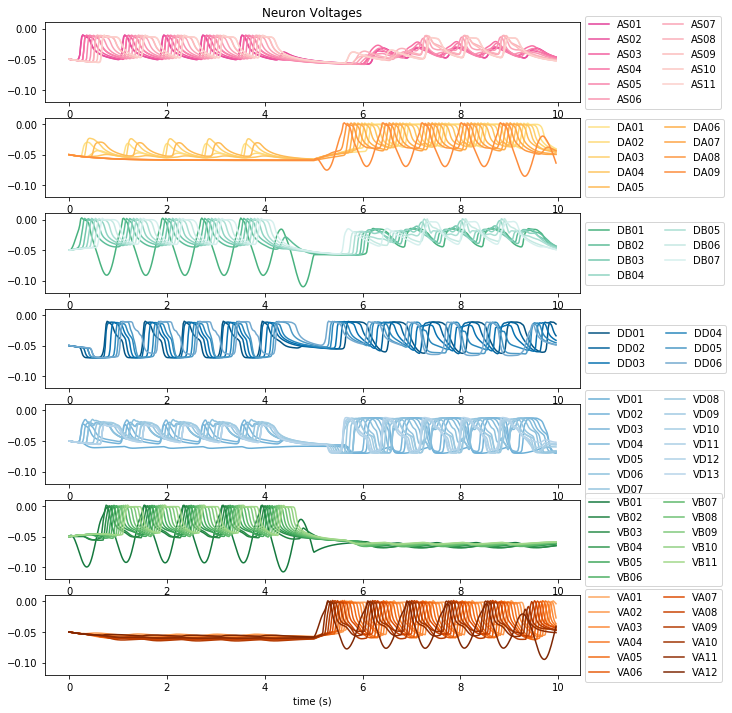

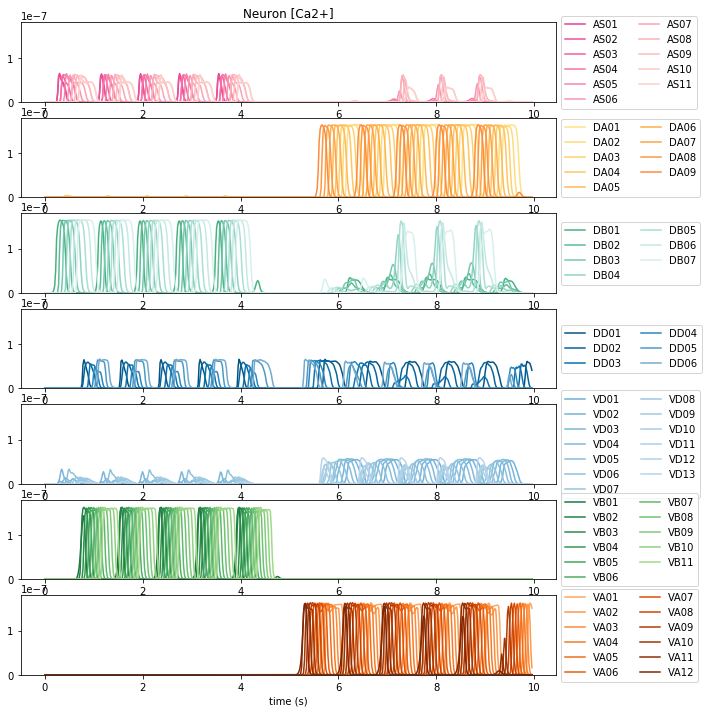

In [154]:
plot_all_motor_neurons(H_1, cells, "Neuron Voltages", (-0.12, 0.01))
plot_all_motor_neurons(H_2, cells, "Neuron [Ca2+]", (0, 18e-8))

Neurons: 
['AS01', 'AS02', 'AS03', 'AS04', 'AS05', 'AS06', 'AS07', 'AS08', 'AS09', 'AS10', 'AS11', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'DA01', 'DA02', 'DA03', 'DA04', 'DA05', 'DA06', 'DA07', 'DA08', 'DA09', 'DB01', 'DB02', 'DB03', 'DB04', 'DB05', 'DB06', 'DB07', 'DD01', 'DD02', 'DD03', 'DD04', 'DD05', 'DD06', 'VA01', 'VA02', 'VA03', 'VA04', 'VA05', 'VA06', 'VA07', 'VA08', 'VA09', 'VA10', 'VA11', 'VA12', 'VB01', 'VB02', 'VB03', 'VB04', 'VB05', 'VB06', 'VB07', 'VB08', 'VB09', 'VB10', 'VB11', 'VD01', 'VD02', 'VD03', 'VD04', 'VD05', 'VD06', 'VD07', 'VD08', 'VD09', 'VD10', 'VD11', 'VD12', 'VD13']
[15, 16, 17, 18, 19, 20, 21, 22, 23]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


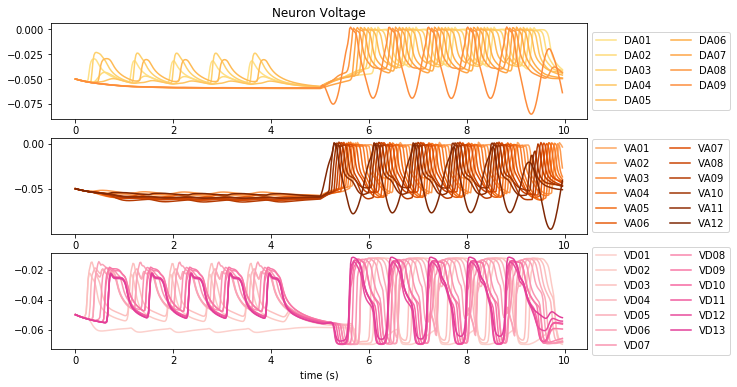

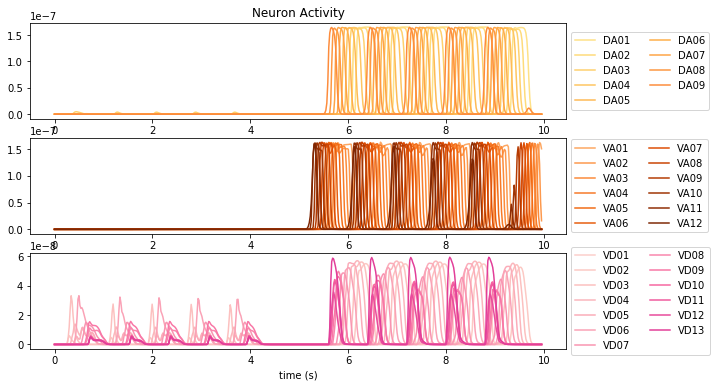

In [150]:
if include_neurons:
    print('Neurons: ')
    print(cells)
    
    data_1 = H_1
    data_2 = H_2
    legend = cells
    
    #################
    # CELLS TO PLOT #
    #################
    
    '''
    first_cells = ['DB1', 'VB1']
    second_cells = ['VA1', 'DA1']
    third_cells = ['AS1']
    #'''
    
    #'''
    range_incl = lambda start, end:range(start, end + 1)
    first_cells = ["DA{:02d}".format(c) for c in range_incl(1, 15)]
    second_cells = ["VA{:02d}".format(c) for c in range_incl(1, 15)]
    #third_cells = ['AVAR', 'AVAL']
    third_cells = ["VD{:02d}".format(c) for c in range_incl(1, 15)]
    #'''
    count = 0
    first_index = []
    second_index = []
    third_index = []
    for i in range(len(cells)):
        if cells[i] in first_cells:
            first_index.append(i)
        elif cells[i] in second_cells:
            second_index.append(i)
        elif cells[i] in third_cells:
            third_index.append(i)
        count = count+1
    
    print(first_index)
    print(second_index)
    print(third_index)
        
    #plot_data(data, legend, title, xlabel, ylabel, ylimits)
    plot_three_data(data_1, legend, 'Neuron Voltage', first_index, second_index, third_index)
    plot_three_data(data_2, legend, 'Neuron Activity', first_index, second_index, third_index)
else:
    print('No neurons to plot')

Neurons: 
['AS01', 'AS02', 'AS03', 'AS04', 'AS05', 'AS06', 'AS07', 'AS08', 'AS09', 'AS10', 'AS11', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'DA01', 'DA02', 'DA03', 'DA04', 'DA05', 'DA06', 'DA07', 'DA08', 'DA09', 'DB01', 'DB02', 'DB03', 'DB04', 'DB05', 'DB06', 'DB07', 'DD01', 'DD02', 'DD03', 'DD04', 'DD05', 'DD06', 'VA01', 'VA02', 'VA03', 'VA04', 'VA05', 'VA06', 'VA07', 'VA08', 'VA09', 'VA10', 'VA11', 'VA12', 'VB01', 'VB02', 'VB03', 'VB04', 'VB05', 'VB06', 'VB07', 'VB08', 'VB09', 'VB10', 'VB11', 'VD01', 'VD02', 'VD03', 'VD04', 'VD05', 'VD06', 'VD07', 'VD08', 'VD09', 'VD10', 'VD11', 'VD12', 'VD13']
Do you want to plot all neurons? [Y/n]Y


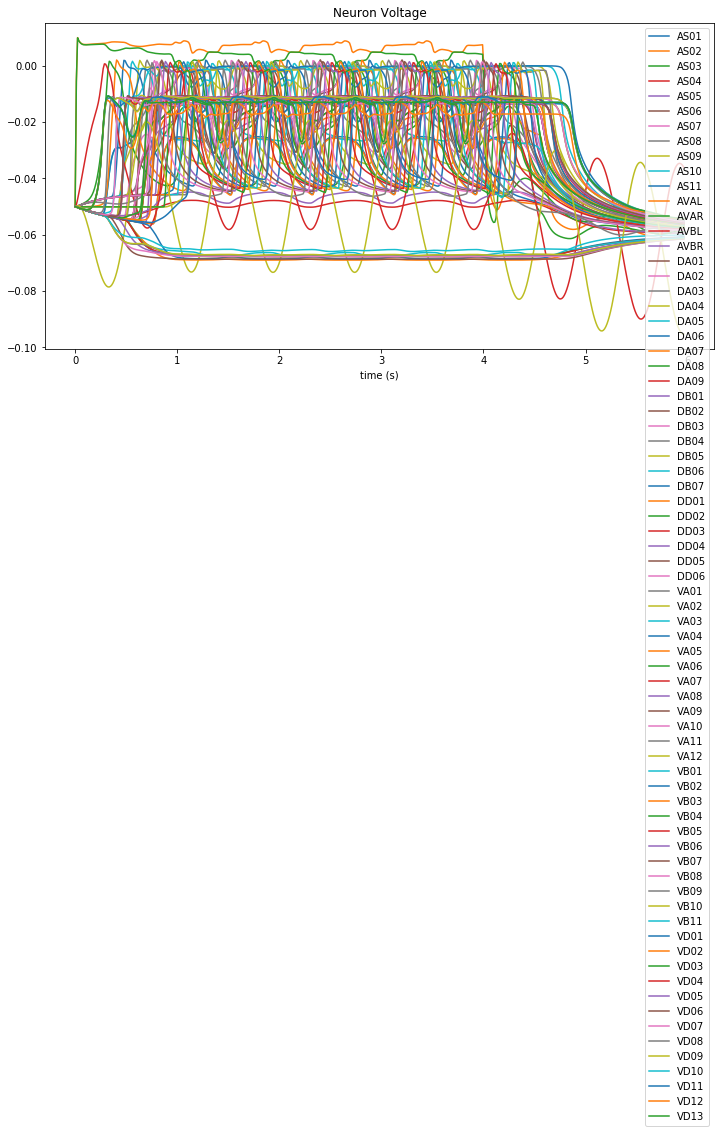

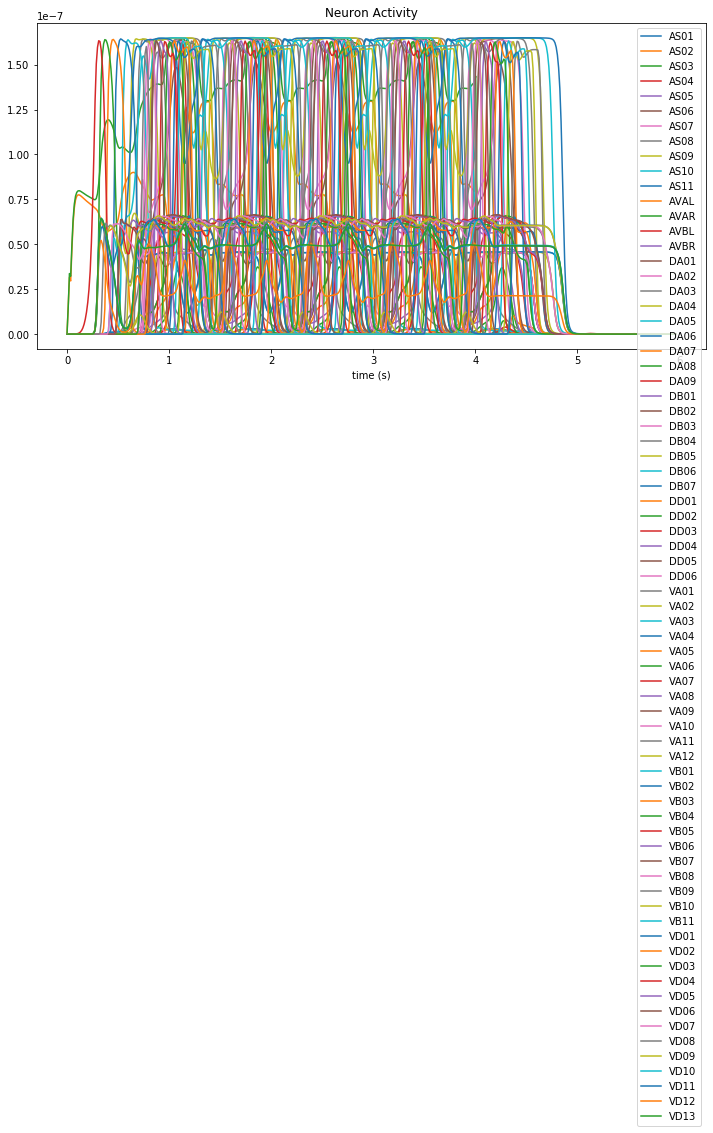

In [118]:
if include_neurons:
    print('Neurons: ')
    print(cells)
    Q1 = input('Do you want to plot all neurons? [Y/n]')
    if Q1 == 'Y':
        plotAll = True
    elif Q1 == 'n':
        plotAll = False
    else: 
        print('Please respond [Y/n]')
    
    if plotAll:
        data_1 = H_1
        data_2 = H_2
        legend = cells
    else:
        
        transp_data_1 = np.transpose(H_1)[0]
        transp_data_2 = np.transpose(H_2)[0]
        
        insertNeurons = True
        cells2 = []
        while insertNeurons:
            Q2 = input('Insert name of one neuron: (q to quit)')
            if Q2 == 'q':
                insertNeurons = False
            elif Q2 in cells:
                cells2.append(Q2)
            else:
                print('Error: Neuron not found in this simulation!')
        
        cells2 = list(set(cells2)) # Delete possible duplicates
        cells2.sort() # Alphabetical order
        
        for i in range(len(cells)):
            if cells[i] in cells2:
                transp_data_1 = np.vstack((transp_data_1, np.transpose(H_1)[i+1]))
                transp_data_2 = np.vstack((transp_data_2, np.transpose(H_2)[i+1]))
        data_1 = np.transpose(transp_data_1)
        data_2 = np.transpose(transp_data_2)
        legend = cells2
        
    #plot_data(data, legend, title, xlabel, ylabel, ylimits)
    plot_data(data_1, legend, 'Neuron Voltage')
    plot_data(data_2, legend, 'Neuron Activity')
else:
    print('No neurons to plot')

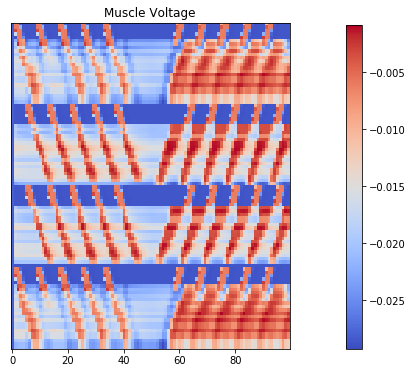

NameError: name 'array2' is not defined

In [339]:
array = np.delete(H_3,0,1)
#array2 = np.delete(H_4,0,1)


map_plot(np.transpose(array), 'Muscle Voltage')
map_plot(np.transpose(array2), 'Muscle [Ca2+]')




In [106]:
if include_muscles: 
    H_3 = prepare_array(read_data(muscle_voltage), 100)
    plot_data(H_3)
    H_4 = prepare_array(read_data(muscle_activity), 100)
    plot_data(H_4)
else:
    print('No muscles to plot')

No muscles to plot


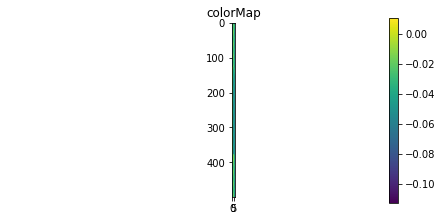

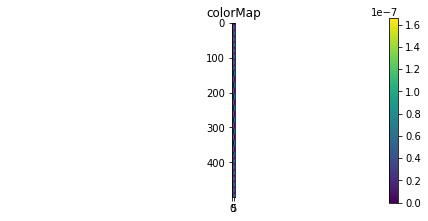

In [107]:
if movement:
    H_1 = read_data(neuron_voltage)
    H_2 = read_data(neuron_activity)
    H_1 = np.delete(H_1,0,1) #Delete time column
    H_2 = np.delete(H_2,0,1)
    H_1 = prepare_array(H_1, 500)
    H_2 = prepare_array(H_2, 500)
    movement_plot(H_1)
    movement_plot(H_2)
    
else:
    print('No movement plot')

In [64]:
H_1[0]

array([ 0.  , -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05])

In [175]:
neuron_names = ['AS', 'DA', 'DB', 'DD', 'VB', 'VB', 'VA']
for neuron in neuron_names:
    neurons = [neuron + "{:02d}".format(c) for c in range_incl(1, 15)]
    print(neurons)

['AS01', 'AS02', 'AS03', 'AS04', 'AS05', 'AS06', 'AS07', 'AS08', 'AS09', 'AS10', 'AS11', 'AS12', 'AS13', 'AS14', 'AS15']
['DA01', 'DA02', 'DA03', 'DA04', 'DA05', 'DA06', 'DA07', 'DA08', 'DA09', 'DA10', 'DA11', 'DA12', 'DA13', 'DA14', 'DA15']
['DB01', 'DB02', 'DB03', 'DB04', 'DB05', 'DB06', 'DB07', 'DB08', 'DB09', 'DB10', 'DB11', 'DB12', 'DB13', 'DB14', 'DB15']
['DD01', 'DD02', 'DD03', 'DD04', 'DD05', 'DD06', 'DD07', 'DD08', 'DD09', 'DD10', 'DD11', 'DD12', 'DD13', 'DD14', 'DD15']
['VB01', 'VB02', 'VB03', 'VB04', 'VB05', 'VB06', 'VB07', 'VB08', 'VB09', 'VB10', 'VB11', 'VB12', 'VB13', 'VB14', 'VB15']
['VB01', 'VB02', 'VB03', 'VB04', 'VB05', 'VB06', 'VB07', 'VB08', 'VB09', 'VB10', 'VB11', 'VB12', 'VB13', 'VB14', 'VB15']
['VA01', 'VA02', 'VA03', 'VA04', 'VA05', 'VA06', 'VA07', 'VA08', 'VA09', 'VA10', 'VA11', 'VA12', 'VA13', 'VA14', 'VA15']


In [45]:
range_incl = lambda start, end:range(start, end + 1)
neuron_names = ['AS', 'DA', 'DB', 'DD', 'VB', 'VB', 'VA']
count = 0
#indexes = np.array[[np.zeros(15)]]
for neuron in neuron_names:
    neurons = [neuron + "{:02d}".format(c) for c in range_incl(1, 15)]
    index = []
    for i in range(len(cells)):
        if cells[i] in neurons:
            index.append(i)
    print(index)
    #indexes = np.vstack((indexes,index))
    count = count + 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[15, 16, 17, 18, 19, 20, 21, 22, 23]
[24, 25, 26, 27, 28, 29, 30]
[31, 32, 33, 34, 35, 36]
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
